## Importing Essential Libraries

In [454]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Loading the rice dataset from uci repo

In [455]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features.to_numpy()
y_raw = student_performance.data.targets.to_numpy()
#y_raw = y_raw[:, 2]  # I'm using only the 3rd target column (final grade)

### Encoding feature columns

In [456]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# encode the first column (school)
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])   # gender

# encode the 4th column. Rural or Urban
X[:, 3] = le.fit_transform(X[:, 3])    # address type 
X[:, 4] = le.fit_transform(X[:, 4])    # family size
X[:, 5] = le.fit_transform(X[:, 5])    # family cohabitation status

print("X shape before oneHot ", X.shape)  # Todo: remove this

# 9th column (mother's job) is nominal
onehotencoder = OneHotEncoder(categories='auto', sparse_output=False)    # set to false to return ndarry instead of scipy.sparse._csr.csr_matrix
col_9_encoded = onehotencoder.fit_transform(X[:, 8].reshape(-1, 1))
print("new dim added: ", col_9_encoded.shape)
X = np.concatenate((X[:,:8], col_9_encoded, X[:, 9:]), axis=1)  # add/concat the RHS array as a new column(s). Now we have 34cols
# at this point, col9 at idx8 has extended to indexes 8,9,10,11,12 due to the new encoded indexes
print(f"X's shape after mjob5: {X.shape}")

# encoding father's job column. Originally col idx9, now idx13
col_fjob_encoded = onehotencoder.fit_transform(X[:, 13].reshape(-1, 1))
print("new dim added: ", col_fjob_encoded.shape)
X = np.concatenate((X[:,:13], col_fjob_encoded, X[:, 14:]), axis=1)  # add/concat the RHS array as 5 new column(s)
print(f"X's shape after fjob5: {X.shape}")

# encoding the reason column
col_reason_encoded = onehotencoder.fit_transform(X[:, 18].reshape(-1, 1))
print("new dim added: ", col_reason_encoded.shape)
X = np.concatenate((X[:,:18], col_reason_encoded, X[:, 19:]), axis=1)  # add/concat the RHS array as 4 new column(s)
print(f"X's shape after reason4: {X.shape}")

# encoding the guardian column
col_guardian_encoded = onehotencoder.fit_transform(X[:, 22].reshape(-1, 1))
print("new guard cols added: ", col_guardian_encoded.shape)
X = np.concatenate((X[:,:22], col_guardian_encoded, X[:, 23:]), axis=1)  # add/concat the RHS array as 3 new column(s)
print(f"X's shape after guardian3: {X.shape}")

# encoding the remaining binary columns
for col in range(28, 36):
    X[:, col] = le.fit_transform(X[:, col]) 

print(f"X's new shape: {X.shape}")
print(X[0])

X shape before oneHot  (649, 30)
new dim added:  (649, 5)
X's shape after mjob5: (649, 34)
new dim added:  (649, 5)
X's shape after fjob5: (649, 38)
new dim added:  (649, 4)
X's shape after reason4: (649, 41)
new guard cols added:  (649, 3)
X's shape after guardian3: (649, 43)
X's new shape: (649, 43)
[0 0 18 1 0 0 4 4 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0
 0.0 1.0 0.0 2 2 0 1 0 0 0 1 1 0 0 4 3 4 1 1 3 4]


In [457]:
# adding extra output columns to X
G1,G2 = y_raw[:,0].reshape(-1,1), y_raw[:,1].reshape(-1,1)
print(X.shape)
X = np.concatenate((X, G1, G2), axis=1)
print(X.shape)

(649, 43)
(649, 45)


### converting y to 1D array


In [458]:
y = y_raw[:,2].ravel()

## Splitting the dataset into the Training and Test sets

In [459]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

## Feature Scaling
we scale the features so they're in the same range

In [460]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [461]:
print(f"X and y shapes: {X.shape}, {y.shape}")

X and y shapes: (649, 45), (649,)


## Training the SVM model on the Training set

In [462]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", degree=3, random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Insample Prediction: on training data

In [463]:
y_pred_ins = classifier.predict(X_train)
#print(np.concatenate((y_pred_ins.reshape(len(y_pred_ins),1), y_train.reshape(len(y_train),1)),1))

### Let's see the confusion matrix and accuracy score

In [464]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_ins)
#print(cm)
accuracy_score(y_train, y_pred_ins)

0.9444444444444444

## Outsample Prediction: on test data and confusion matrix

In [465]:
y_pred_out = classifier.predict(X_test)

In [466]:
cm = confusion_matrix(y_test, y_pred_out)
#print(cm)
accuracy_score(y_test, y_pred_out)

0.30153846153846153

In [467]:
print(y_test.shape, y_pred_out.shape)
y_pred_out[:200]
# #print(set(y))
# from sklearn.model_selection import learning_curve,StratifiedKFold
# # Initialize StratifiedKFold
# skf = StratifiedKFold(n_splits=5)

# for train_index, test_index in skf.split(X, y):
#     print("Train:", np.bincount(y[train_index]))
#     print("Test:", np.bincount(y[test_index]))

(325,) (325,)


array([ 8, 14, 17, 10, 11, 13, 13, 17, 11, 11, 10, 11, 13, 10, 17, 13, 13,
       14, 11, 11, 12, 10, 17, 16, 12,  0, 13, 12, 13, 12, 16, 17, 12, 15,
       11,  8, 14, 12, 11, 12, 17, 18, 11, 15, 13, 11, 13, 11, 12, 11,  8,
       15, 11, 11,  8, 11, 12, 11, 15, 13, 12,  8, 12,  9, 13, 13, 12, 13,
       12,  8,  9, 11, 15, 11, 16, 14, 13, 14, 12, 13, 13, 11,  9, 13, 16,
       12, 11, 15, 12, 12, 16, 15, 17, 13, 10,  9, 14, 11, 13, 13, 12, 10,
        8, 12,  8,  8, 16,  9,  9, 16, 11, 13, 13, 13, 10, 10, 15, 17, 10,
       11, 10, 11, 10, 10, 12, 15, 16, 18, 10, 16, 13, 10, 15, 14, 13,  7,
        9, 10, 14, 10, 15, 11,  9, 12, 14, 11,  9, 11, 17, 15, 16, 13, 14,
        9, 11, 14, 16,  8, 11, 18, 13, 16, 12, 12, 12, 10, 13,  8,  9, 11,
        9, 13, 15, 17, 16,  6, 11, 14,  7,  9, 15, 17, 10,  8,  9,  0, 12,
       10, 12, 11,  8, 18,  9, 11, 10, 10, 11, 11, 11, 11], dtype=int64)

In [468]:
# from sklearn.model_selection import learning_curve
# #from sklearn.neighbors import KNeighborsClassifier

# #knn_classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
# train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training score')
# plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
# plt.xlabel('Training examples')
# plt.ylabel('Score')
# plt.legend(loc='best')
# plt.title('Learning Curve')
# plt.show()

# Plotting The Learning Curve

C:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


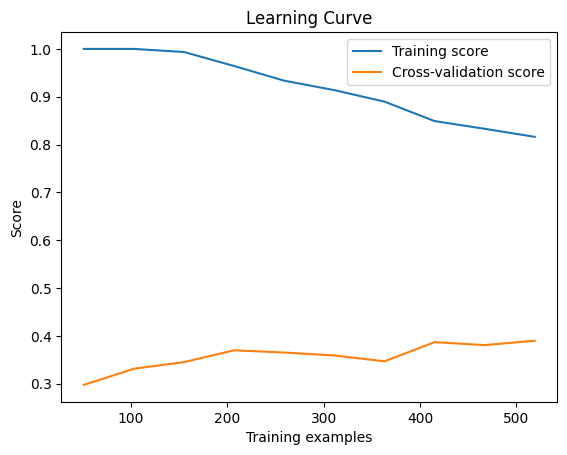

In [469]:
from sklearn.model_selection import learning_curve,StratifiedKFold
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=10, shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

In [470]:
# print(train_sizes)
# print(train_scores)
# print("Test scores \n", test_scores)


## Experimenting with different values of k

In [471]:
# k_vals = [i for i in range(1,40)]
# train_accuracies = []
# test_accuracies = []
# for k in k_vals:
#     classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
#     classifier.fit(X_train, y_train)

#     y_pred_test = classifier.predict(X_test)
#     y_pred_train = classifier.predict(X_train)
    
#     train_accuracies.append(accuracy_score(y_train, y_pred_train))
#     test_accuracies.append(accuracy_score(y_test, y_pred_test))


# # now let's plot it - Accuracy vs k
# plt.figure(figsize=(10, 6))
# plt.plot(k_vals, train_accuracies, label='In-Sample Accuracy (Training Set)', marker='o', color='b')
# plt.plot(k_vals, test_accuracies, label='Out-of-Sample Accuracy (Test Set)', marker='o', color='r')
# plt.title('KNN Accuracy for Different Values of k')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.xticks(k_vals)
# plt.legend()
# plt.grid(True)
# plt.show()

In [472]:
print(train_accuracies)
print(test_accuracies)

[]
[]
